## 1. Business Understanding

### Project Overview
SyriaTel, a telecommunications company, is experiencing customer churn —customers leaving the service which leads to loss of revenue and market share. The business wants to predict which customers are likely to churn, so they can intervene before it's too late.

### Objective
The goal is to build a **binary classification model** to predict whether a customer will churn (`Yes` or `No`). This will help SyriaTel take proactive measures to retain high-risk customers.

### Key Stakeholders
- **Customer Retention Team** – reduce churn through early outreach.
- **Marketing** – tailor offers to at-risk users.
- **Executives** – make strategic, data-driven decisions.

### Key Questions
- What factors are most strongly associated with churn?
- Can we predict churn early using customer data?
- Which services or customer segments have the highest churn rates?

### Success Criteria
- High recall in identifying churners.
- Clear feature insights for actionable business decisions.



## 2. Data Understanding

In this step, we aim to get a clear overview of the dataset:

- Load and preview the data
- Examine feature types and basic statistics
- Identify missing values and duplicates
- Are features categorical, numerical, or boolean?
-  What is the distribution of the target variable (`Churn`)?

These insights will help guide our data preparation and modeling strategy.The dataset being used for this project was obtained from **kaggle**


Step 2.1 – Import Libraries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, LabelEncoder

#Make visuals look cleaner
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None)


Step 2.2 – Load Dataset

In [182]:
# Load dataset
df = pd.read_csv("../data/bigml_59c28831336c6604c800002a.csv")

# Preview first 5 rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Step 2.3 – Basic Data Overview

In [183]:
# Shape and column names
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")
print("\nColumn names:", df.columns.tolist())

# Data types and non-null counts
df.info()


Dataset contains 3333 rows and 21 columns.

Column names: ['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6  

 Step 2.4 – Descriptive Statistics

In [184]:
# Numeric summary
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Step 3 – Data Preparation

Step 3.1 – Missing Values & Duplicates

In [185]:
# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing if not missing.empty else "No missing values found.")

# Duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Missing Values:
 No missing values found.

Number of duplicate rows: 0


Before we analyze or model the data, we need to prepare it to ensure it is clean and consistent.

 3.2 Drop Irrelevant Columns

In [186]:
# Drop 'state' and 'phone number' – not useful for prediction
df.drop(columns=['state', 'phone number','area code'], inplace=True)


 3.3 Encode Binary Categorical Columns

In [187]:
# Convert 'international plan' and 'voice mail plan' to 0/1
binary_map = {'yes': 1, 'no': 0}
df['international plan'] = df['international plan'].map(binary_map)
df['voice mail plan'] = df['voice mail plan'].map(binary_map)


3.4 Encode Target Column

In [188]:
# Convert boolean churn column to 0/1
df['churn'] = df['churn'].astype(int)


3.5 Handle Outliers (Cap using IQR)

In [189]:
# Cap numeric outliers using the IQR method
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower, np.where(df[col] > upper, upper, df[col]))


3.6 Final Check

In [190]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   float64
 1   international plan      3333 non-null   float64
 2   voice mail plan         3333 non-null   float64
 3   number vmail messages   3333 non-null   float64
 4   total day minutes       3333 non-null   float64
 5   total day calls         3333 non-null   float64
 6   total day charge        3333 non-null   float64
 7   total eve minutes       3333 non-null   float64
 8   total eve calls         3333 non-null   float64
 9   total eve charge        3333 non-null   float64
 10  total night minutes     3333 non-null   float64
 11  total night calls       3333 non-null   float64
 12  total night charge      3333 non-null   float64
 13  total intl minutes      3333 non-null   float64
 14  total intl calls        3333 non-null   

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333.000000,3333.0,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.003300,0.0,0.276628,8.098710,179.816157,100.473597,30.569292,201.009541,100.134113,17.086016,200.828143,100.098410,9.037381,10.254575,4.424842,2.769320,1.476298,0.144914
std,39.644112,0.0,0.447398,13.687436,54.152190,19.863740,9.205865,50.401365,19.758567,4.284135,50.118622,19.443717,2.255212,2.721007,2.272343,0.734445,1.107194,0.352067
min,1.000000,0.0,0.000000,0.000000,34.650000,46.500000,5.890000,63.550000,46.500000,5.400000,64.550000,48.000000,2.915000,3.100000,0.000000,0.845000,0.000000,0.000000
25%,74.000000,0.0,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.0,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,0.0,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,206.500000,0.0,1.000000,50.000000,325.450000,154.500000,55.330000,338.350000,154.500000,28.760000,337.750000,152.000000,15.195000,17.500000,10.500000,4.725000,3.500000,1.000000


Step 4 – EDA (Exploratory Data Analysis)

4.1 Overall Class Balance (Target Variable)

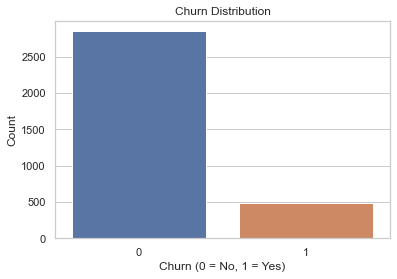

,proportion
0,0.855086
1,0.144914


In [191]:
# Check churn distribution
sns.countplot(x='churn', data=df)
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Print class balance
df['churn'].value_counts(normalize=True).to_frame('proportion')


#### Intepretation
The left bar (0) represents customers who did not churn — they stayed with SyriaTel.

The right bar (1) represents customers who did churn — they left the service

From the chart:

The churn = 0 group has around 2850 customers.

The churn = 1 group has around 480 customers.

Roughly 86% of customers stayed, while only 14% churned.




4.2 Univariate: Numerical Feature Distributions

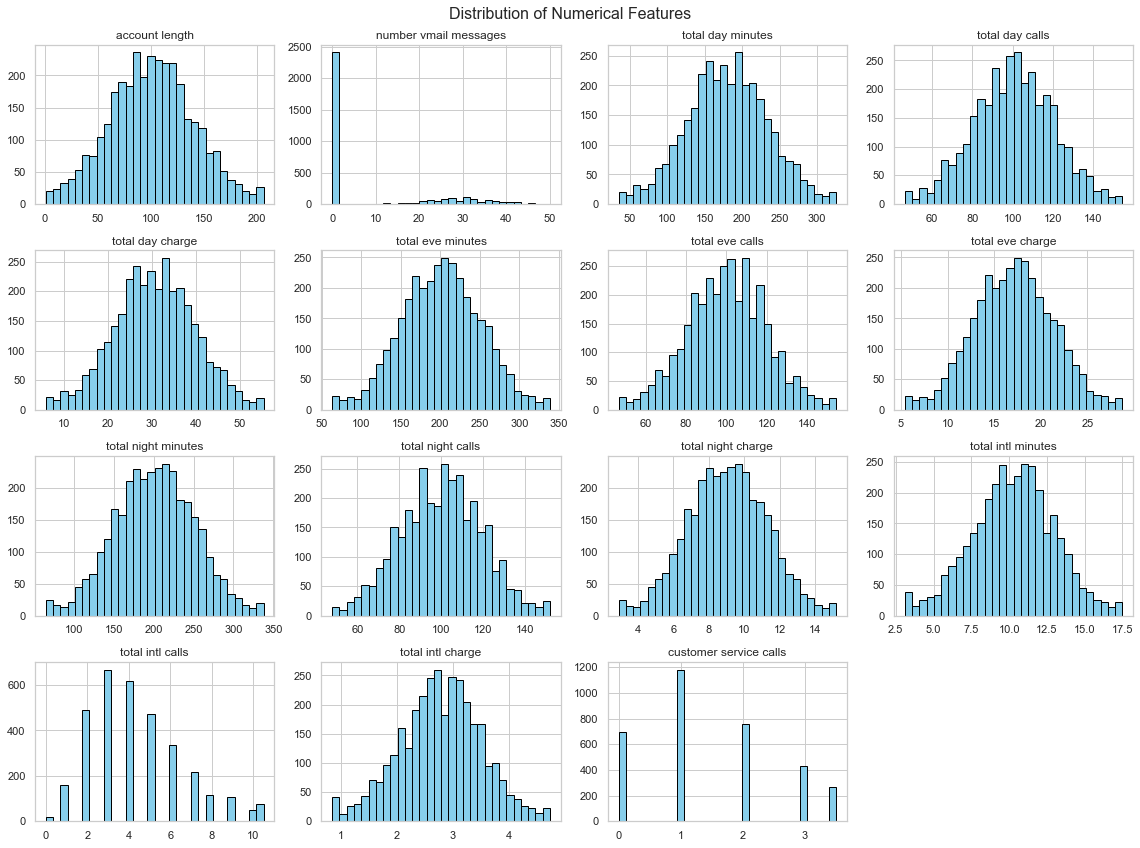

In [192]:

# Plot distributions of all numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Explicitly exclude any unwanted columns
exclude_cols = ['international plan', 'voice mail plan']
num_cols = [col for col in num_cols if col not in exclude_cols]

# Plot histograms for numeric features
df[num_cols].hist(figsize=(16, 12), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()



### Intepretations

- **Normal Distributions**: Most usage-related features (minutes, calls, charges) are bell-shaped, indicating balanced behavior across the customer base.
- **Skewed Features**: `number vmail messages`, `total intl calls`, and `customer service calls` are highly skewed. These features may offer strong predictive power for churn.
- **Actionable Insight**: Features like high `customer service calls` are worth investigating in churn analysis as they may correlate with customer dissatisfaction.





4.3 Boxplots of Numerical Features by Churn

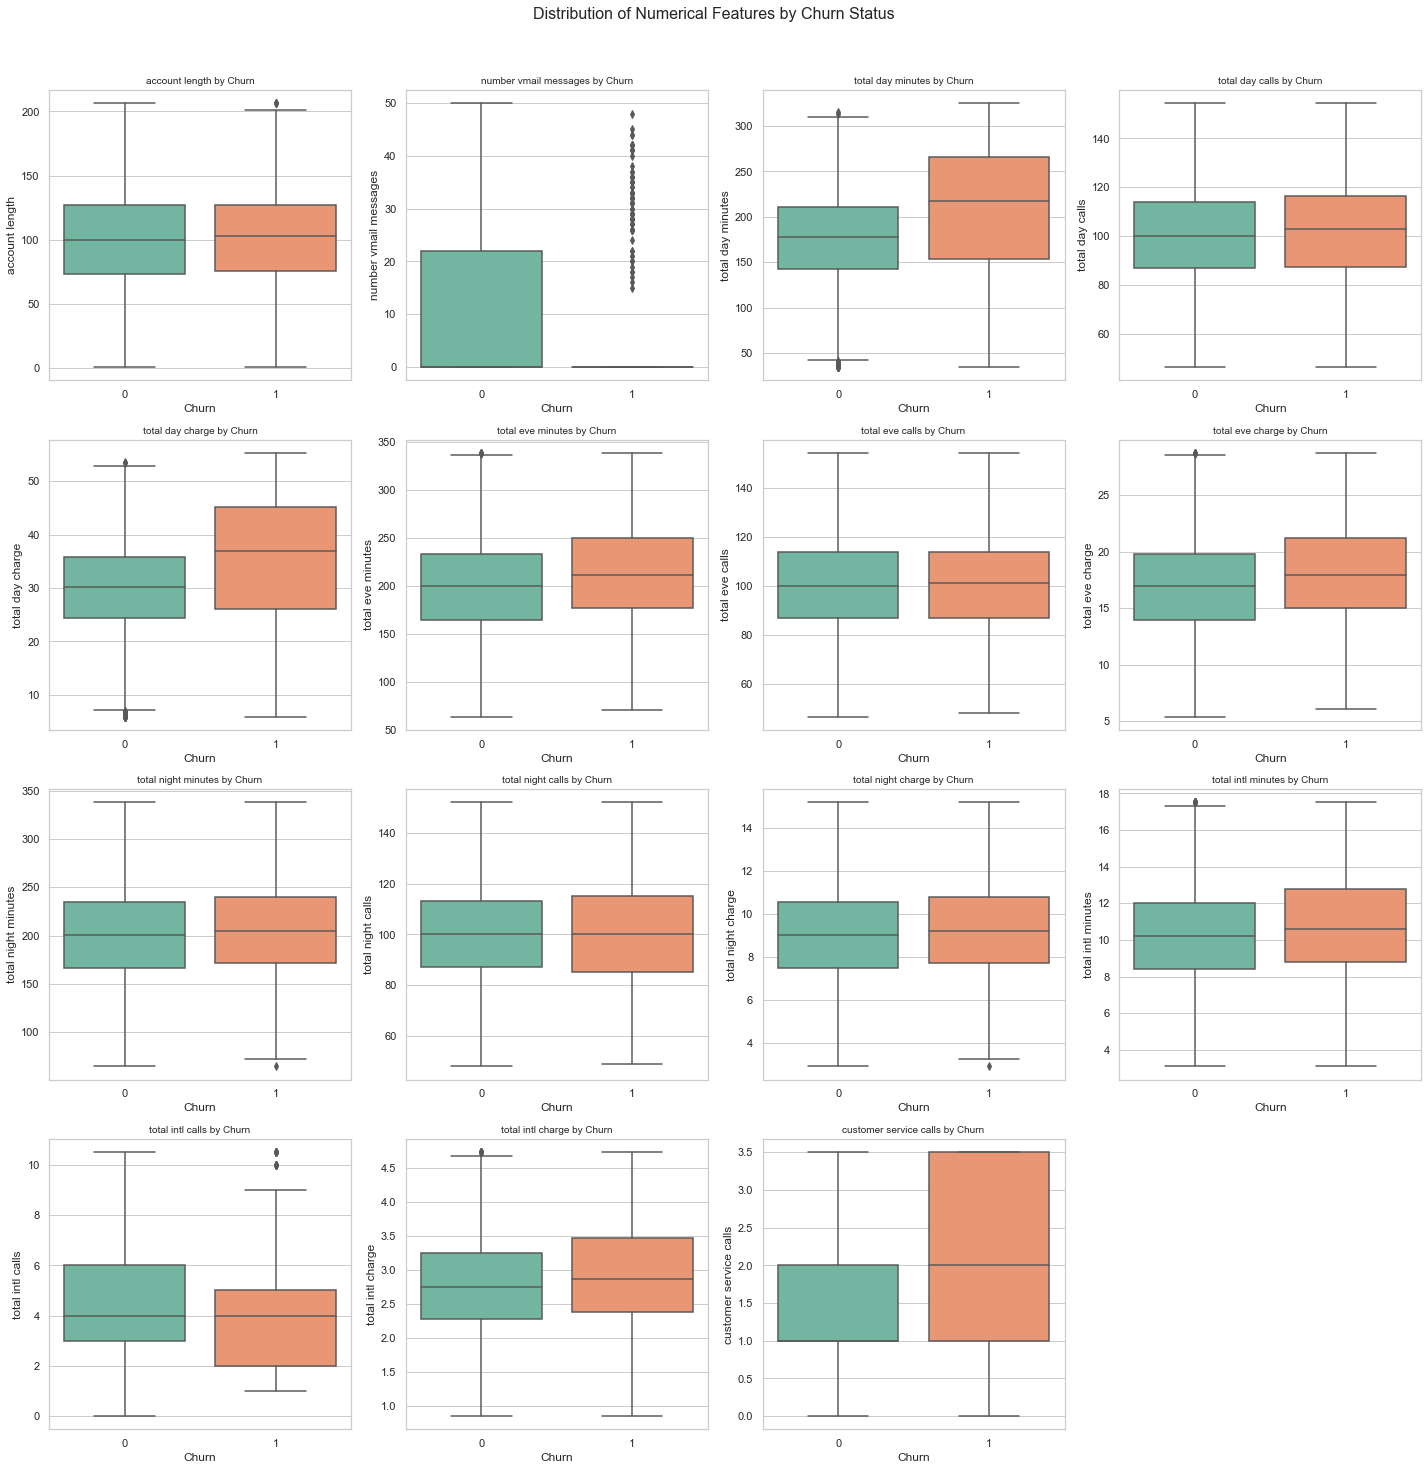

In [194]:
# Boxplots to compare churn vs key numerical features

# Define features to exclude
excluded = ['churn', 'voice mail plan', 'international plan']
num_cols = df.select_dtypes(include='number').drop(columns=excluded, errors='ignore').columns
# Setup subplot grid
n_cols = 4  # columns per row
n_rows = math.ceil(len(num_cols) / n_cols)

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()
# Generate boxplots
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, x='churn', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{col} by Churn", fontsize=10)
    axes[i].set_xlabel('Churn')
    axes[i].set_ylabel(col)
# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle("Distribution of Numerical Features by Churn Status", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

Interpretation

**Customer Service Calls** is the most discriminative feature—more service calls are strongly linked with churn.

**Voice Mail Messages** show a negative relationship with churn — voicemail usage is more common in loyal customers.

Most call-related features (minutes and charges) show small shifts in distribution, implying usage behavior differences.

Many features have outliers, especially in number vmail messages, intl calls, and customer service calls.